# **CNN assignment**(Do read the note at the end)

Description: Here we are going to use CNN to classify images of elephants,tigers,cheetah's and crocodiles. Basically multiclass classificiation using CNN.

**Q.1** Import all required modules

In [9]:
#Your code here
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
directory = "/content/drive/MyDrive/Colab Notebooks/data"


In [27]:
%cd /content/drive/MyDrive/Colab Notebooks
!ls
%cd data

/content/drive/MyDrive/Colab Notebooks
data				 opencv.ipynb	   tensorFlow_wncc.ipynb  yolo
ImagePreprocessing-OpenCV.ipynb  tensorflow.ipynb  Untitled1.ipynb
/content/drive/.shortcut-targets-by-id/1Nxwrymd9n1qfum_2OEgU_1dtwbsVLbdv/data


**Q.2** Load data using image_dataset_from_directory(https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory)

In [34]:
data= tf.keras.preprocessing.image_dataset_from_directory(
    directory,
    labels = 'inferred',
    batch_size = 32,
    image_size = (64,64),

)

Found 1657 files belonging to 4 classes.


In [28]:
!ls


Cheetah  Crocodile  Elephants  Tiger




*   Since data object is not iterable,we will create a nummpy iterator for data.
*   Then use batch to iterate through our data



In [16]:
data_iterator=data.as_numpy_iterator()

In [17]:
batch=data_iterator.next()

Run the below code and batch code 2-3 times to visualise the labels given to different animals.

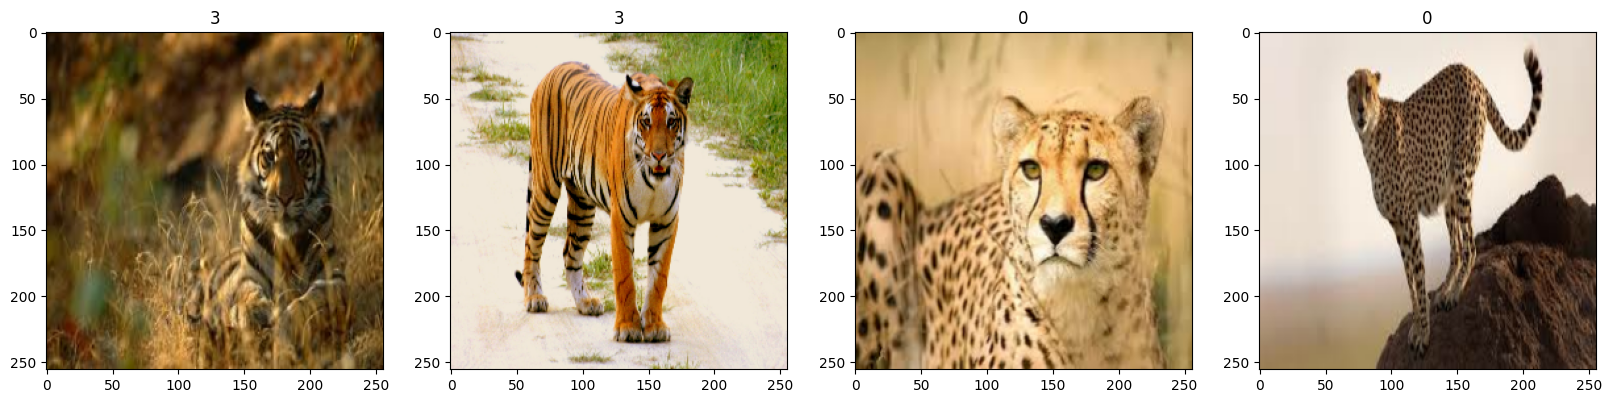

In [12]:
fig,ax=plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

**Q.3** Map the data such that all pixel values lie between 0 and 1 using the **lambda function**

In [35]:
normalization_layer=tf.keras.layers.Rescaling(1./255)
data=data.map(lambda x,y: (normalization_layer(x),y))

**Q.4** Split the data into train set and test set(and validation set if needed) using **data.take**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-class-take-method/) and **data.skip**(https://www.geeksforgeeks.org/tensorflow-js-tf-data-dataset-skip-method/)

In [36]:
#Your code here
dataset_size = len(data)
print(dataset_size)
train_size = int(0.9 * dataset_size)
val_size = int(0.2 * dataset_size)
test_size = int(0.1 * dataset_size)


training_dataset  = data.take(train_size)
validation_dataset = data.skip(train_size).take(val_size)
test_dataset = data.skip(train_size).skip(val_size)

52


**Creating the model**

**Q.5** Write code to create CNN model including fully connected layers with softmax as final layer.

In [51]:
model= tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))


model.add(layers.Conv2D(64,(3,3),activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
#model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [44]:
# model = tf.keras.Sequential([

#     layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
#     layers.MaxPooling2D((2, 2)),

#     layers.Conv2D(64, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),


#     layers.Conv2D(128, (3, 3), activation='relu'),
#     layers.MaxPooling2D((2, 2)),


#     layers.Flatten(),

#     layers.Dense(128, activation='relu'),
#     layers.Dropout(0.5),
#     layers.Dense(64,activation = 'relu'),
#     layers.Dropout(0.5),
#      layers.Dense(32,activation = 'relu'),
#     layers.Dropout(0.5),
#     layers.Dense(10, activation='softmax') ])

**Q.6** Compile your model

In [52]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

**Q.7** Fit your model with train set and make sure to keep **less epochs**(10-15) as the dataset size is very large.

In [56]:
model.fit(training_dataset,validation_data = validation_dataset,epochs=15)

Epoch 1/15
41/41 [==============================] - 23s 534ms/step - loss: 0.2774 - accuracy: 0.9108 - val_loss: 0.4992 - val_accuracy: 0.8250
Epoch 2/15
41/41 [==============================] - 22s 500ms/step - loss: 0.2655 - accuracy: 0.9093 - val_loss: 0.5229 - val_accuracy: 0.8062
Epoch 3/15
41/41 [==============================] - 23s 516ms/step - loss: 0.2067 - accuracy: 0.9367 - val_loss: 0.3933 - val_accuracy: 0.8687
Epoch 4/15
41/41 [==============================] - 32s 748ms/step - loss: 0.2054 - accuracy: 0.9421 - val_loss: 0.4359 - val_accuracy: 0.8625
Epoch 5/15
41/41 [==============================] - 23s 519ms/step - loss: 0.1385 - accuracy: 0.9634 - val_loss: 0.5705 - val_accuracy: 0.8750
Epoch 6/15
41/41 [==============================] - 23s 531ms/step - loss: 0.1315 - accuracy: 0.9657 - val_loss: 0.4629 - val_accuracy: 0.8750
Epoch 7/15
41/41 [==============================] - 32s 751ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.4374 - val_accuracy: 0.8813

**Q.8** Test your code with test set

In [57]:
loss,accuracy=model.evaluate(test_dataset)

6/6 [==============================] - 11s 4ms/step - loss: 0.4349 - accuracy: 0.8973


In [58]:
# Do not change this code
if accuracy>=0.85:
  print(f"Congratulations, CNN assignment complete!! Your accuracy is {accuracy}")
else:
  print(f"Try again, not enough accuracy! Your accuracy is {accuracy}" )

Congratulations, CNN assignment complete!! Your accuracy is 0.8972973227500916


**Note: 1. Many of you will get very high train accuracy but low test accuracy. This is called overfitting, this can be solved by increasing the train set size. If your getting low accuracy for both train and test, modify your layers in the model.**

**2.Do use T4GPU.Ideally your first epoch will take quite sometime and rest of the epochs will be faster but if all your epochs are taking a lot of time, try starting a new gpu session(open a new gmail account and open colab on that) because your free gpu might have exhausted itself.**

**3.Other than that everything should be fine, happy learning!!**